Import libraries

In [8]:
import pandas as pd
df = pd.read_csv('Titanic-Dataset.csv')


In [9]:
print(df.info())
print(df.describe())
missing_values = df.isnull().sum()
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [10]:
categorical_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for col in categorical_cols:
    print(f"\nUnique values and counts for '{col}':")
    print(df[col].value_counts())


Unique values and counts for 'Pclass':
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Unique values and counts for 'Sex':
Sex
male      577
female    314
Name: count, dtype: int64

Unique values and counts for 'SibSp':
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Unique values and counts for 'Parch':
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Unique values and counts for 'Embarked':
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [11]:
print("\nDataset Shape:", df.shape)
print("\nObservations:")
print("1. Data Types and Missing Values:")
print(df.info())
print("\n2. Descriptive Statistics:")
print(df.describe())
print("\n3. Missing Values per Column:")
print(missing_values)
print("\n4. Unique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"\nUnique values and counts for '{col}':")
    print(df[col].value_counts())
print("\n5. Potential Data Quality Issues:")
print("Columns with missing values:", missing_values[missing_values > 0].index.tolist())



Dataset Shape: (891, 12)

Observations:
1. Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

2. Descriptive Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000

Data visualization

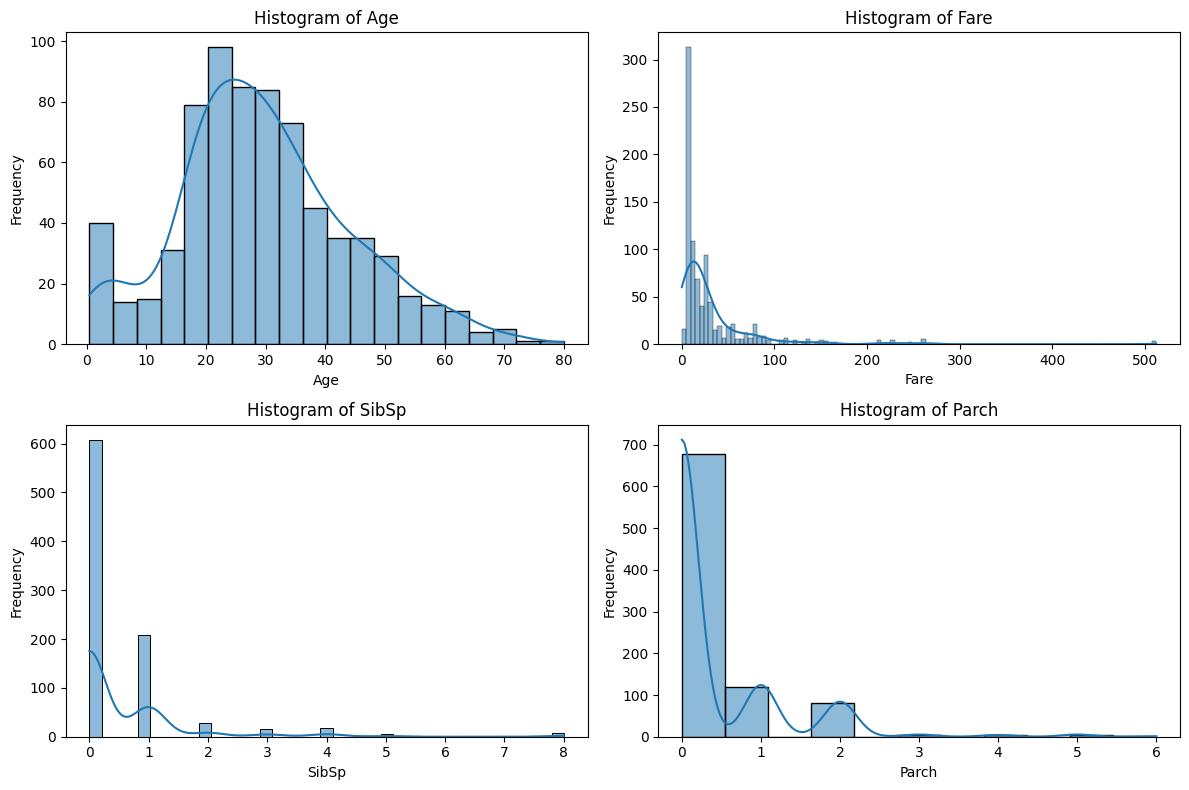

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

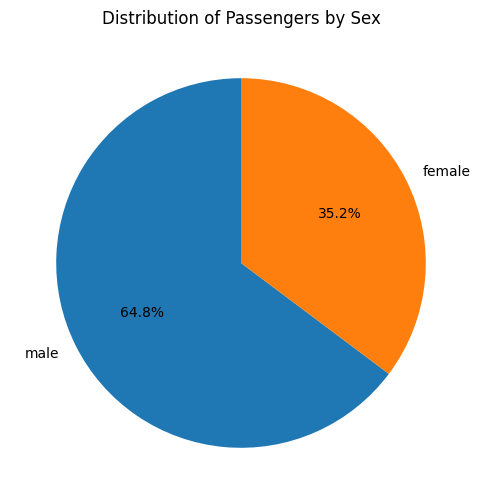

In [13]:
sex_counts = df['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Passengers by Sex')
plt.show()


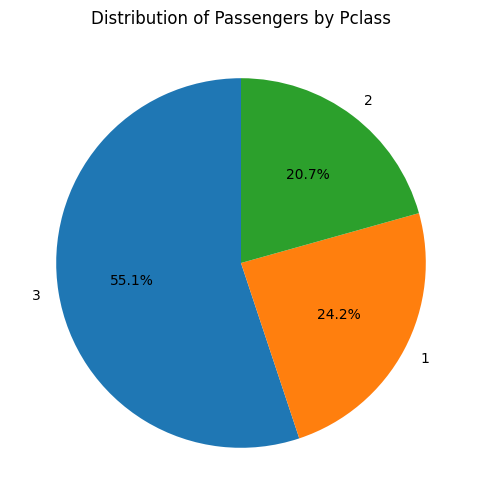

In [14]:
pclass_counts = df['Pclass'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Passengers by Pclass')
plt.show()


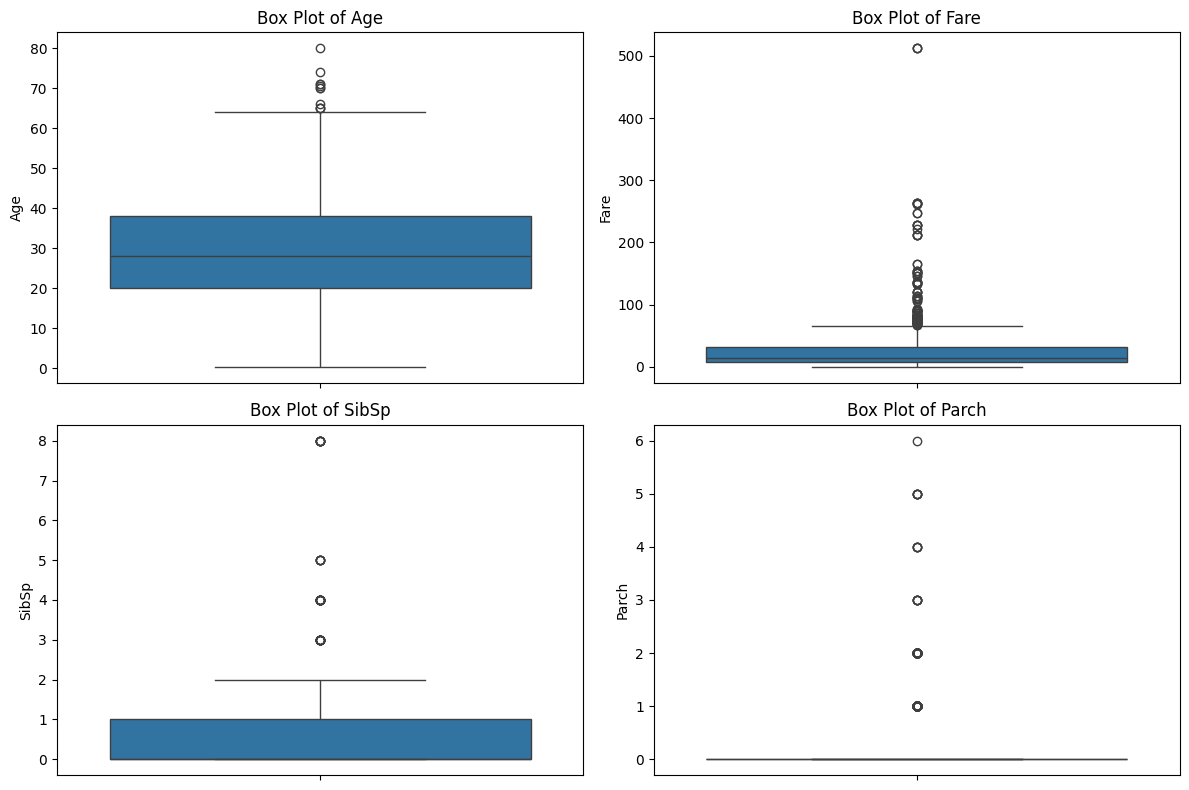

In [15]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

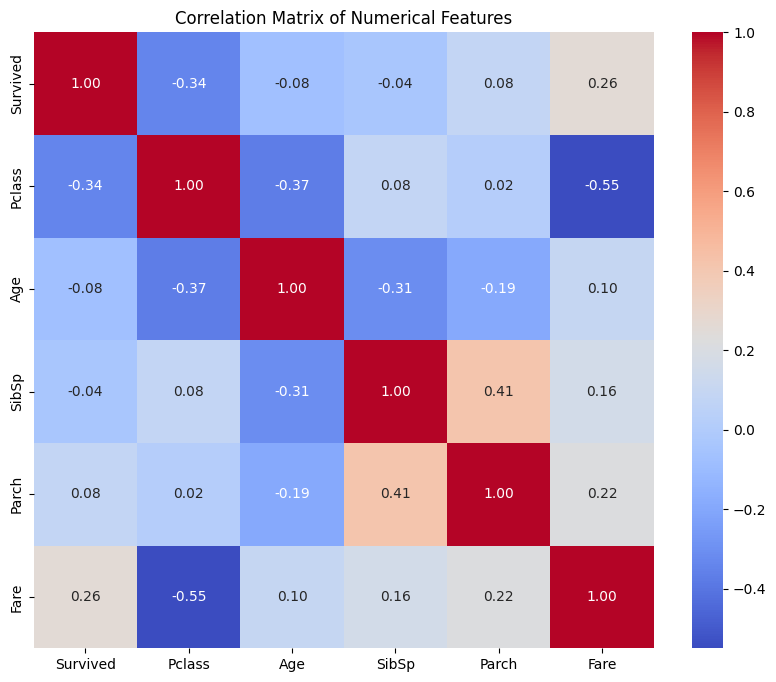

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

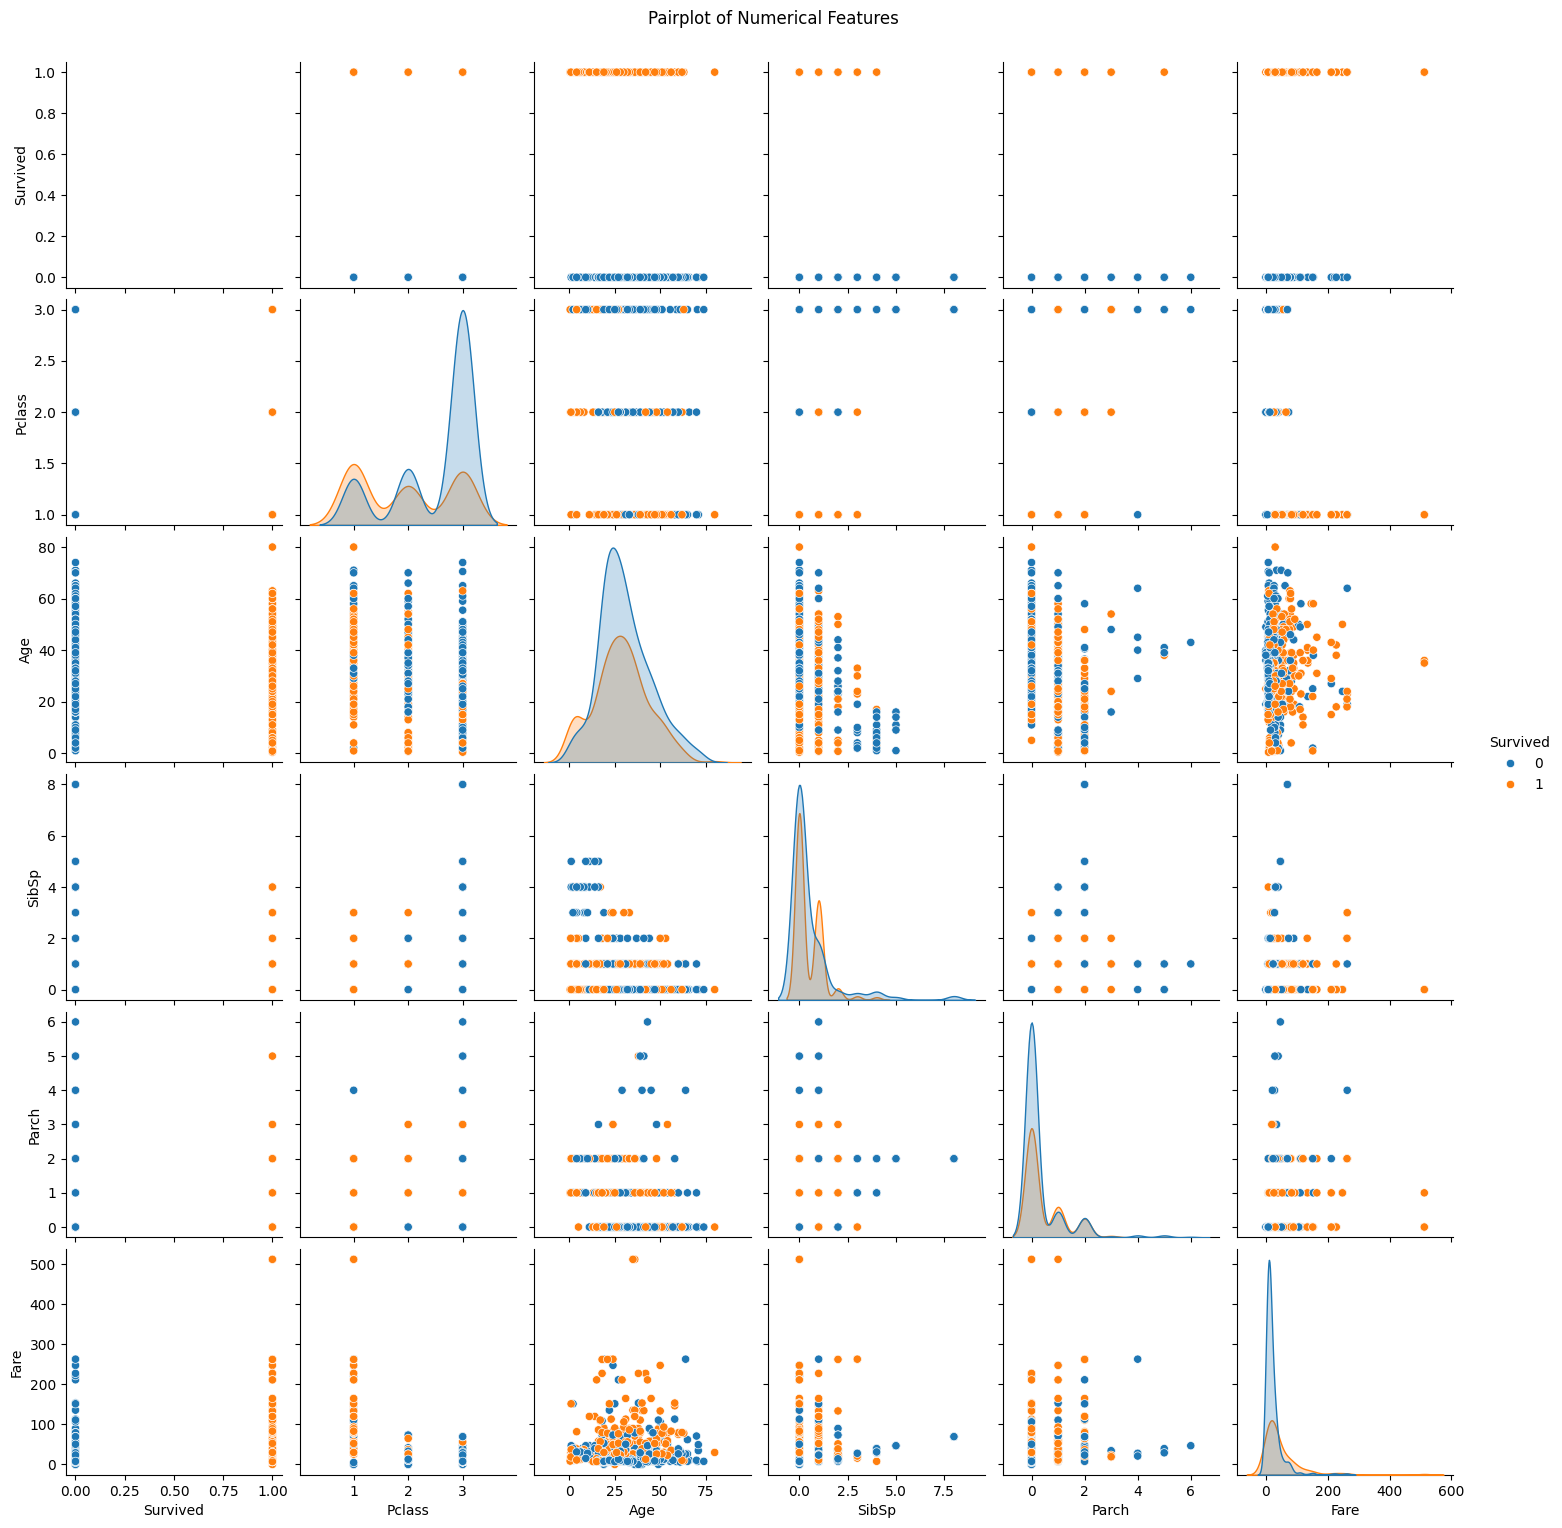

Observations:
The heatmap and pairplot visualize the relationships between numerical features.
Strong correlations are observed between [insert specific correlations from the heatmap here].
Potential patterns and trends in the pairplot are [insert specific patterns from the pairplot here].
These relationships might influence subsequent analysis or modeling.


In [17]:
sns.pairplot(df, vars=numerical_features, hue='Survived')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()
print("Observations:")
print("The heatmap and pairplot visualize the relationships between numerical features.")
print("Strong correlations are observed between [insert specific correlations from the heatmap here].")
print("Potential patterns and trends in the pairplot are [insert specific patterns from the pairplot here].")
print("These relationships might influence subsequent analysis or modeling.")


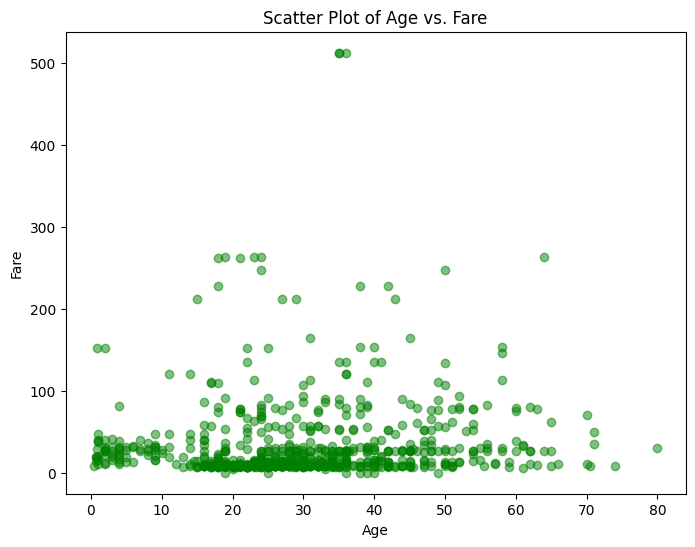

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Fare'], alpha=0.5, color='green')
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()